In [1]:
import random
import math
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from scipy.stats import gamma
num_exp=10 #число экспериментов
N=5 #число людей в очереди
m=1 #мат ожидание
d=0.5 #дисперсия
Gu=[] #массив значений общих сумм выплат во всех экспериментах
GuN=0 #значение суммы выплат в текущем эксперименте x i-тое
l=1/math.sqrt(d) #параметр лямбда для экспоненциального распределения
b=m-1/l #параметр смещения для экспоненциального распределения
alpha=0.5 #уровень значимости
for i in range(num_exp):
    for j in range(N):
        GuN+=b-1/l*math.log(random.random())
    Gu+=[GuN]
    GuN=0
Gu.sort()
#Gu[0]=2
if(num_exp<=100):
    print(Gu)

[3.814508242109203, 4.48229358067154, 4.735328213706281, 5.277412098916622, 5.6423482390113975, 5.837565103663169, 6.339899910815663, 6.673246583597729, 6.712800897779478, 6.795664285993044]


In [2]:
ferl=[] # распределение эрланга для x из выборки
ferlD=[]
ferls=0
ferlm=1
Guferl=[]
L=l
B=N*b
Gustart=B
num=100
h=(Gu[num_exp-1]+1-B)/num
for i in range(num):
    Guferl+=[Gustart]
    Gustart+=h
for j in range(num):
    for i in range(1, N+1):
        ferls+=ferlm
        ferlm=ferlm*L*(Guferl[j]-B)/i
    ferl+=[1-math.exp(-L*(Guferl[j]-B))*ferls]
    #print(ferl[j])
    ferls=0
    ferlm=1
for j in range(num_exp):
    for i in range(1, N+1):
        ferls+=ferlm
        ferlm=ferlm*L*(Gu[j]-B)/i
    ferlD+=[1-math.exp(-L*(Gu[j]-B))*ferls]
    #print(ferl[j])
    ferls=0
    ferlm=1

In [3]:
D=ferl[0]
for j in range(num_exp):
    D=max(abs(j/num_exp-ferlD[j]), D)
xsr=0
Dn=N*d
for i in range(num_exp):
    xsr+=Gu[i]
xsr/=num_exp
S=0
for i in range(num_exp):
    S+=(xsr-Gu[i])*(xsr-Gu[i])
S/=num_exp
R=Gu[num_exp-1]-Gu[0]
E=N*m
Exsr=math.fabs(E-xsr)
DS=math.fabs(Dn-S)
R=Gu[num_exp-1]-Gu[0]
if((num_exp%2)==1):
    Me=Gu[num_exp//2]
else:
    Me=(Gu[num_exp//2-1]+Gu[num_exp//2])/2

In [4]:
from prettytable import PrettyTable
mytable = PrettyTable()
mytable.field_names = ["En", "x", "|En-x|","Dn","S^2", "|Dn-S^2|","Me","R"]
mytable.add_row([E, xsr, Exsr, Dn, S, DS, Me, R])
print(mytable)

+----+-------------------+--------------------+-----+-------------------+-------------------+-------------------+-------------------+
| En |         x         |       |En-x|       |  Dn |        S^2        |      |Dn-S^2|     |         Me        |         R         |
+----+-------------------+--------------------+-----+-------------------+-------------------+-------------------+-------------------+
| 5  | 5.631106715626413 | 0.6311067156264132 | 2.5 | 0.970477201362429 | 1.529522798637571 | 5.739956671337284 | 2.981156043883841 |
+----+-------------------+--------------------+-----+-------------------+-------------------+-------------------+-------------------+


In [5]:
abs=[]
ord=[]
for i in range(num_exp):
    abs+=[Gu[i]]
    abs+=[Gu[i]]
    ord+=[i/num_exp]
    ord+=[(i+1)/num_exp]
abs+=[Gu[num_exp-1]+0.5]
ord+=[1]
a=l

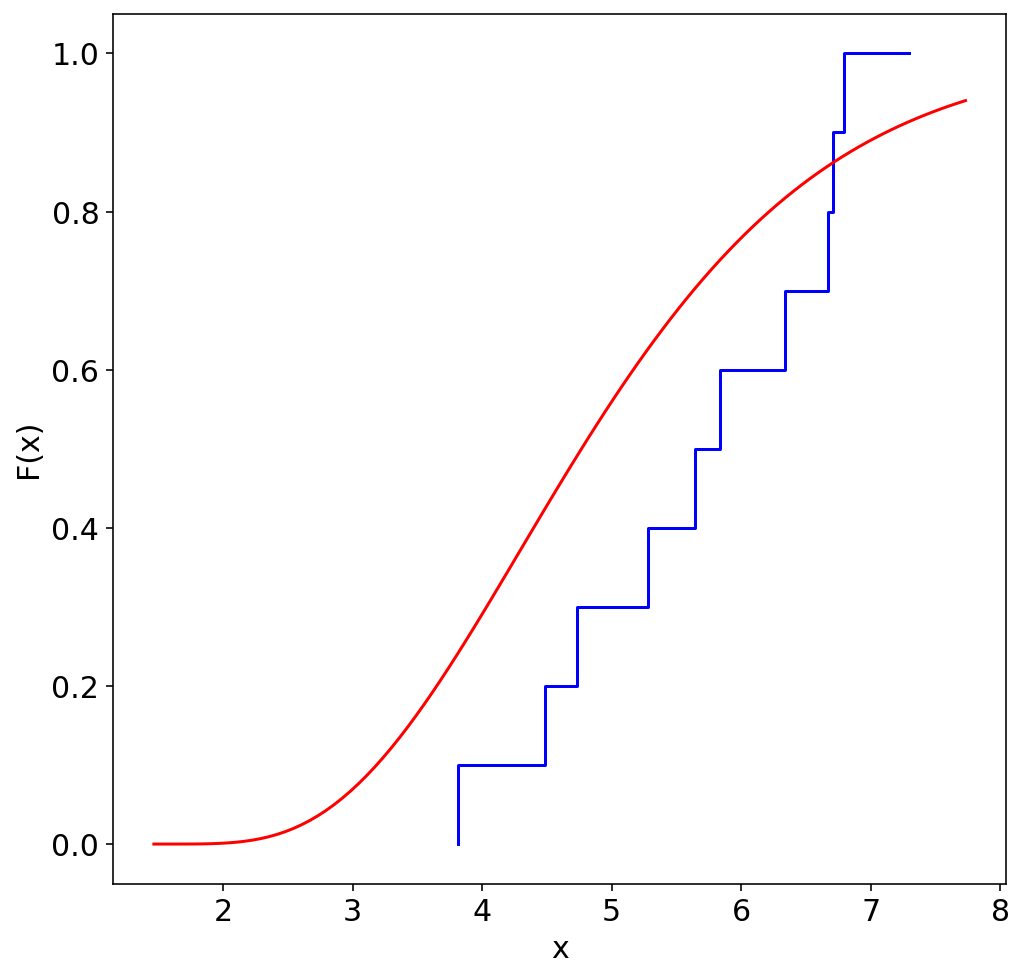

max|Fn-F| =  0.32545904678339915


In [6]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(abs, ord, color = 'blue')
ax.plot(Guferl, ferl, color = 'red')
plt.xlabel('x', fontsize=15)
plt.ylabel('F(x)', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()
print("max|Fn-F| = ", D)

6


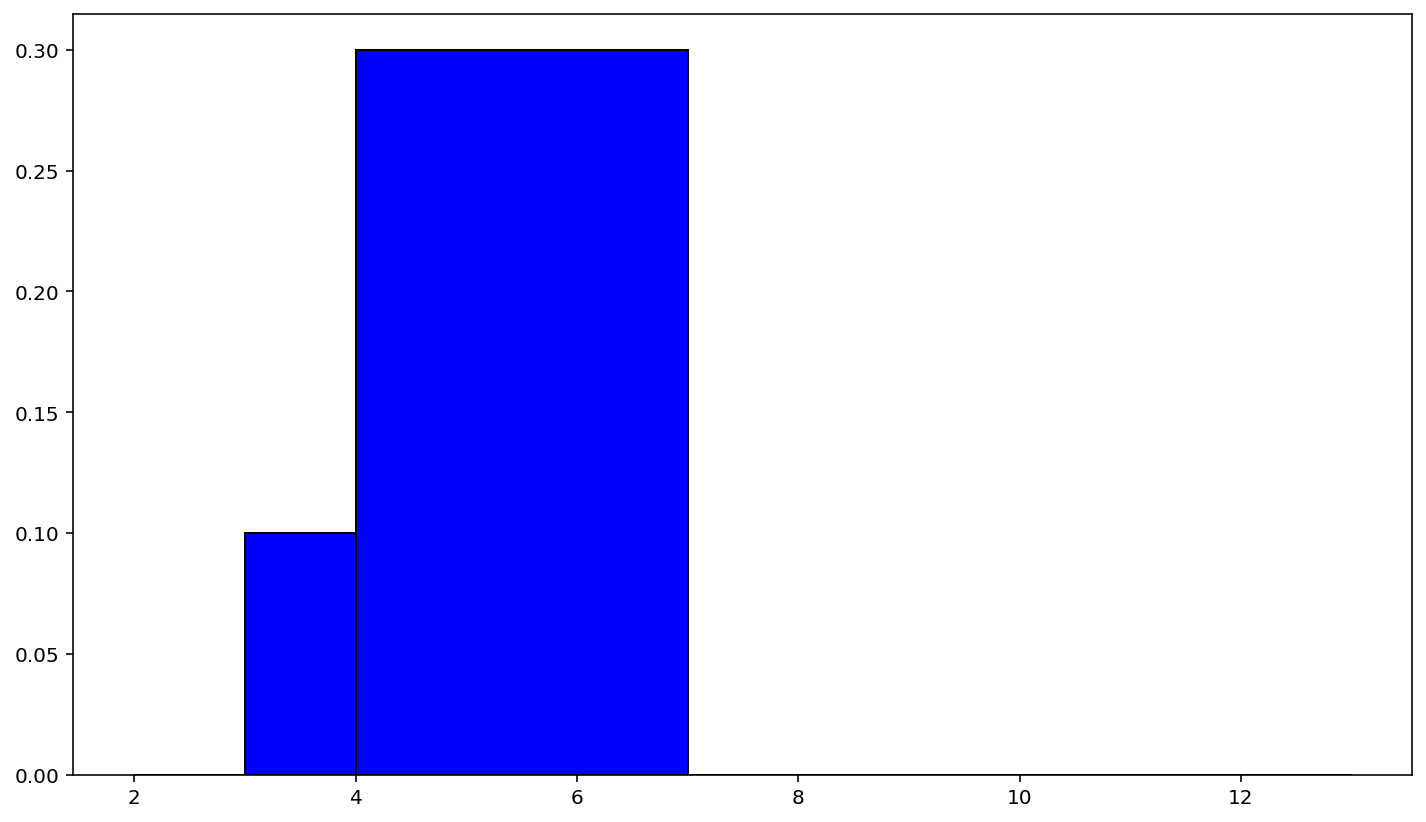

In [7]:
import numpy as np
nitoe=[]
delta=[2, 3, 4, 7, 10, 13] #границы интервалов!!!
k=len(delta)
print(k)
weig=[]
num=np.histogram(Gu, bins=delta)
num=num[0]
count=0
for i in range(num_exp):
    weig+=[1]
for i in range(k-1):
	for j in range(num_exp):
		if ((Gu[j]>delta[i])&(weig[j]==1)&(Gu[j]<delta[i+1])):
			weig[j]=1/(num_exp*(delta[i+1]-delta[i]))
			#print(delta[i])
nitoe=plt.hist(Gu, color = 'blue', edgecolor = 'black',
         bins = delta, weights=weig)
#print(Gu)
#print(weig)

In [8]:
z=[]
for j in range(k-1):
    z+=[delta[j]+(delta[j+1]-delta[j])/2]
nitoe=nitoe[0]
print(nitoe)

[0.  0.1 0.3 0.  0. ]


In [9]:
plotnerl=[]
L=l
B=N*b
for j in range(k-1):
    m1=math.exp(-L*(z[j]-B))
    m2=L*pow(L*(z[j]-B),N-1)
    m3=math.factorial(N-1)
    plotnerl+=[m1*m2/m3]
lengthdelta=[]
for i in range(k-1):
    lengthdelta+=[delta[i+1]-delta[i]]
print("Длины интервалов: ",lengthdelta)
ntabl=[]
for i in range(k-1):
    ntabl+=[nitoe[i]/(num_exp*lengthdelta[i])]
maxdif=0
for i in range(k-1):
    maxdiftemp=plotnerl[i]-ntabl[i]
    maxdiftemp=math.fabs(maxdiftemp)
    maxdif=max(maxdif, maxdiftemp)

Длины интервалов:  [1, 1, 3, 3, 3]


In [10]:
from prettytable import PrettyTable
mytable = PrettyTable()
mytable.field_names = ["zj", "f(zj)", "nj/(ndelt)"]
for i in range(k-1):
    mytable.add_row([z[i], plotnerl[i], ntabl[i]])
print(mytable)
print("max|nj/(n*delta)-f(zj)| = ", maxdif)

+------+-----------------------+----------------------+
|  zj  |         f(zj)         |      nj/(ndelt)      |
+------+-----------------------+----------------------+
| 2.5  |  0.06266304534130346  |         0.0          |
| 3.5  |  0.22744815631223128  |         0.01         |
| 5.5  |  0.20768386952658344  | 0.009999999999999998 |
| 8.5  |  0.027569669952883097 |         0.0          |
| 11.5 | 0.0016400225396861591 |         0.0          |
+------+-----------------------+----------------------+
max|nj/(n*delta)-f(zj)| =  0.21744815631223127


q1, q2, ..., qk= [0.2908457730610375, 0.4757307192141328, 0.23342350772482973]


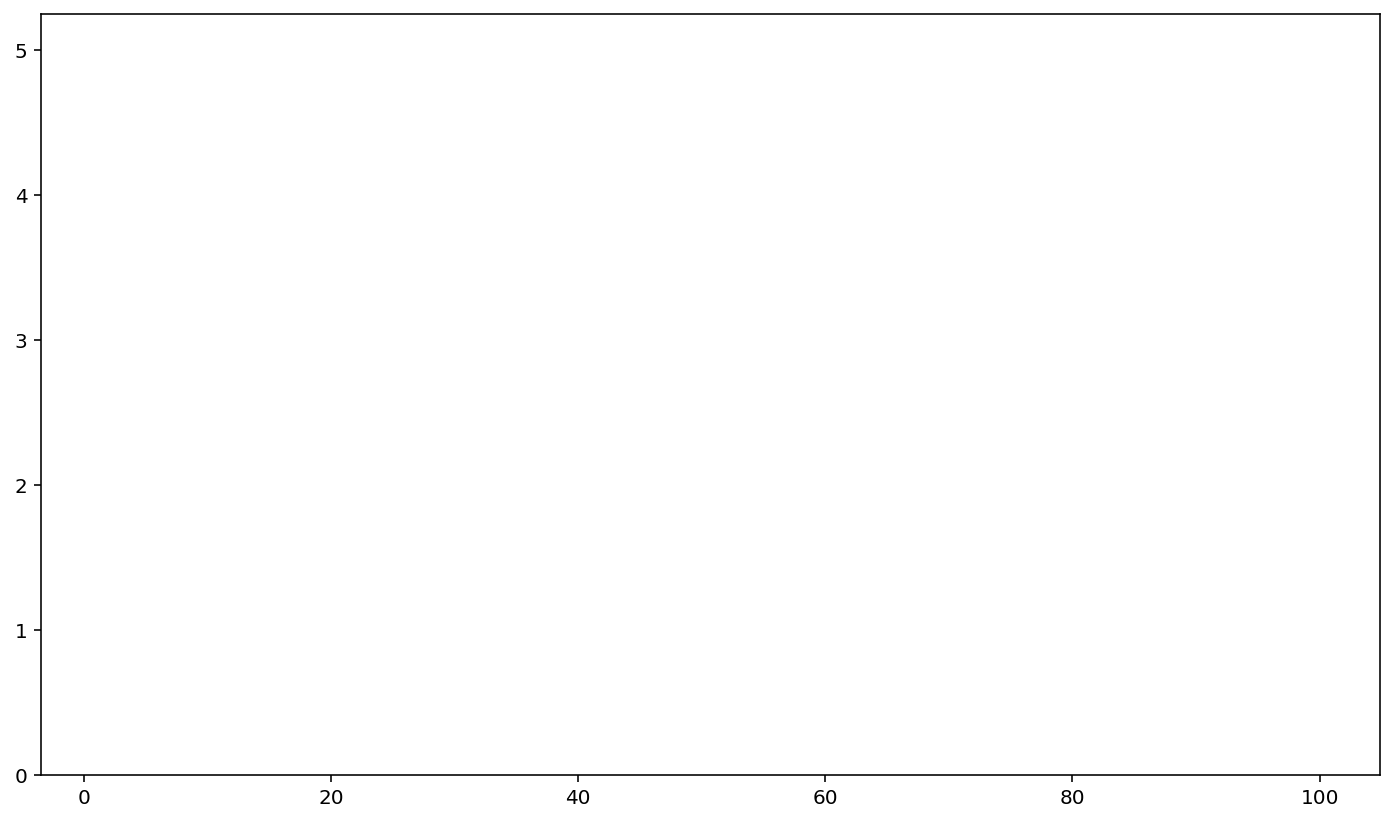

In [11]:
import scipy.integrate as integrate
nitoe=[]
alpha=0.5 #уровень значимости
delta=[B, 4, 6, 100] #границы интервалов
k=len(delta)
plt.plot()
nitoe=plt.hist(Gu, color = 'white', edgecolor = 'white',
         bins = delta)
nitoe=nitoe[0]
qj=[]
fun = lambda x: math.exp(-L*(x-B))*L*pow(L*(x-B),N-1)/math.factorial(N-1)
#print(fun(2.5))
#result=integrate.quad(lambda x: fun, 0, 4)
#print(result)
import scipy.integrate as integrate
import scipy.special as special
for i in range(k-1):
    result = integrate.quad(fun, delta[i], delta[i+1])[0]
    qj+=[result]
print("q1, q2, ..., qk=",qj)

In [12]:
from scipy.stats import chi2
#alpha=0.1
df=k-2
alpha=1-alpha
xi=chi2.ppf(alpha, df)
print(xi)

1.386294361119891


In [13]:
R0=0
for i in range(k-1):
    R0+=(nitoe[i]-num_exp*qj[i])*(nitoe[i]-num_exp*qj[i])/(num_exp*qj[i])
print(R0)

2.4533924124632245


In [14]:
print(xi)
print(R0)
if R0<xi:
    print("Принимаем")
else:
    print("Отвергаем")

1.386294361119891
2.4533924124632245
Отвергаем


In [15]:
print(random.random())

0.42383459576214466
